# Question 3

Import the packages and parameters we need for this question.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
T = 2           # Investment horizon
sigma = 0.32    # Volatility
mu = 0.12       # Real world drift
P0 = 100        # Initial wealth
r = 0.06        # Risk-free rate
delt = 1/250    # Rebalancing interval
B0 = 100        # Initial cash
alpha0 = 0      # Initial risky asset position
S0 = 100        # Initial risky asset price
Nsim = 80000    # Number of simulations

Write the CPPI simulation function under the assumption of GBM.

In [3]:
def CPPI_sim(F, M):
    # F is floors
    # M is multipliers
    N = T/delt

    # Vectorized initial values
    B = B0*np.ones(Nsim)
    S = S0*np.ones(Nsim)
    alpha = alpha0*np.ones(Nsim)
    Pi = P0*np.ones(Nsim)

    i = 1
    while i <= N:
        phi = np.random.normal(0, 1, Nsim)
        S = S*np.exp((mu-sigma**2/2)*delt + sigma*phi*math.sqrt(delt))
        alpha_pre = alpha
        alpha = M*np.maximum(0, B*np.exp(r*delt) + alpha*S - F)/S
        B = B*np.exp(r*delt) - (alpha - alpha_pre)*S
        Pi = B + alpha_pre*S
        i = i + 1
    
    R = np.log(Pi/P0)
    R_mean = np.mean(R)
    R_std = np.std(R)
    R_VAR = np.quantile(R, 0.05) # np.quantile already sorts the data
    R_cVAR = R[R<=R_VAR].mean()

    return R, R_mean, R_std, R_VAR, R_cVAR

# Investment performances
R1 = CPPI_sim(0,1)
R2 = CPPI_sim(0,0.5)
R3 = CPPI_sim(0,2)
R4 = CPPI_sim(85,2)
R5 = CPPI_sim(85,4)

Generate a table containing $F$, $M$, and the mean, standard deviation, $95\%$ $VAR$, and $95\%$ $cVAR$ of $R$.

In [4]:
# Data for the table
F = [0, 0, 0, 85, 85]
M = [1, 0.5, 2, 2, 4]
mean = [R1[1], R2[1], R3[1], R4[1], R5[1]]
std = [R1[2], R2[2], R3[2], R4[2], R5[2]]
VAR = [R1[3], R2[3], R3[3], R4[3], R5[3]]
cVAR = [R1[4], R2[4], R3[4], R4[4], R5[4]]

# Table for F, M, mean, std, VAR, and cVAR
table = {"F": F,
         "M": M,
         "Mean": mean,
         "Standard Deviation": std,
         "95% VAR": VAR,
         "95% cVAR": cVAR}
print(tabulate(table, headers="keys", tablefmt="grid"))

+-----+-----+------------+----------------------+------------+------------+
|   F |   M |       Mean |   Standard Deviation |    95% VAR |   95% cVAR |
+=====+=====+============+======================+============+============+
|   0 | 1   |  0.135813  |             0.451934 | -0.611573  |  -0.799153 |
+-----+-----+------------+----------------------+------------+------------+
|   0 | 0.5 |  0.153393  |             0.226025 | -0.216967  |  -0.312643 |
+-----+-----+------------+----------------------+------------+------------+
|   0 | 2   | -0.0458006 |             0.905069 | -1.54095   |  -1.91915  |
+-----+-----+------------+----------------------+------------+------------+
|  85 | 2   |  0.147461  |             0.204083 | -0.0688154 |  -0.086607 |
+-----+-----+------------+----------------------+------------+------------+
|  85 | 4   |  0.114528  |             0.369009 | -0.13392   |  -0.140985 |
+-----+-----+------------+----------------------+------------+------------+


Generate a plot of the (approximate) probability density function of $R$ for each of the parameter pairs: $(F,M)=(0,1),(0,0.5),(0,2),(85,2),(85,4)$.

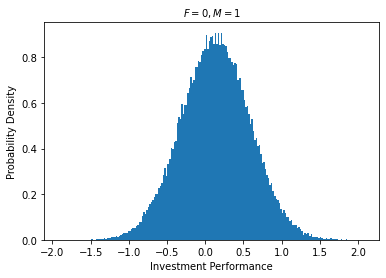

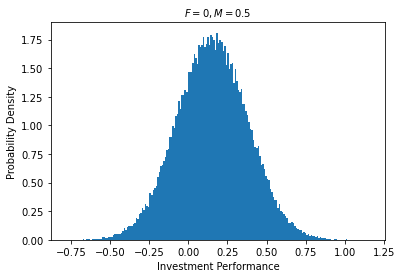

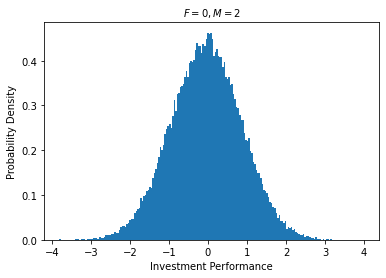

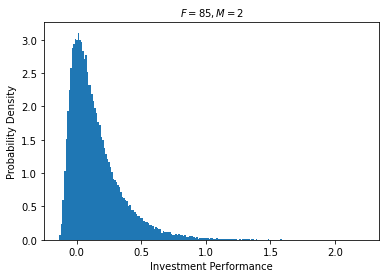

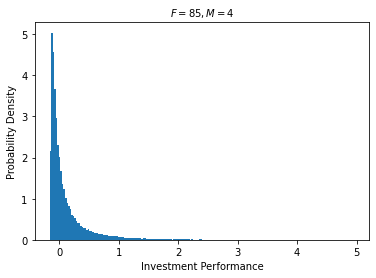

In [5]:
# Plots of probability density functions
plt.rcParams['figure.figsize'] = [6, 4]
plt.hist(R1[0], bins = 200, density = True)
plt.title("$F = 0, M = 1$", fontsize = 10)
plt.xlabel("Investment Performance", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [6, 4]
plt.hist(R2[0], bins = 200, density = True)
plt.title("$F = 0, M = 0.5$", fontsize = 10)
plt.xlabel("Investment Performance", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [6, 4]
plt.hist(R3[0], bins = 200, density = True)
plt.title("$F = 0, M = 2$", fontsize = 10)
plt.xlabel("Investment Performance", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [6, 4]
plt.hist(R4[0], bins = 200, density = True)
plt.title("$F = 85, M = 2$", fontsize = 10)
plt.xlabel("Investment Performance", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.show()
plt.rcParams['figure.figsize'] = [6, 4]
plt.hist(R5[0], bins = 200, density = True)
plt.title("$F = 85, M = 4$", fontsize = 10)
plt.xlabel("Investment Performance", fontsize = 10)
plt.ylabel("Probability Density", fontsize = 10)
plt.show()

Observation:

> When $F=0$, the probability density functions are approximately normally distributed. When $F=85$, the probability density functions are right-skewed.

> Given a fixed $F$, when $M$ gets larger, the probability density function gets more spread out according to the plots, and the absolute values of standard deviation, $95\%$ $VAR$, and $95\%$ $cVAR$ get larger according to the table. To conclude, as $M$ gets larger, the variation of the investment performance (i.e., log return) gets larger.